# Analisi dei consumi elettrici di un utente domestico

* A. input data - 1. year 2.mese <br>
* B. data format- .csv
* C. results - 1. Consumo energetico totale [kWh] 2. Consumo energetico giornaliero per ogni giorno del mese [kWh]
> Consumi casa Silvia.

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

## 1. Preambolo

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("Dates")

using CSV
using DataFrames
using Plots
using Dates

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


## 2. Importa dati consumi in un dataframe

read CSV 2021 <br

Esempio per importare 12 mesi da una cartella

In [2]:
#input
year = "2021"
months = ["gennaio","febbraio","marzo","aprile","maggio","giugno",
"luglio","agosto","settembre","ottobre","novembre","dicembre"]

#inizializza dataframe
df = []

# output - dataframe annuale
for i=1:12
    
    push!(df, CSV.read("data_"*year*"/ExportData_"*months[i]*".csv", DataFrame,
            delim=';', quoted=true, decimal=',',
            #dateformat="dd/mm/yyyy",
            header=1,drop=[:Column98]))
    
end
 df
# Osserva i risultati
# i warning si accendono perche la prima riga dei csv non termina con ;
# df è diventata una matrice con 12 righe
# esempio
# df[1] = data frame di gennaio
# df[3]= data frame di marzo
# df[2][:,95:end] = data frame di febbraio tutte le righe ultime tre colonne

# esempio di come usare il data frame del 2021
#df[2][:,95:end]

# esempio su come avere il vettore che contiene i nomi delle colonne
#names(df[2])

# esempio di come avere il vettore che contiene tutti gli elementi di una colonna
#df[2]."00:00-00:15"

# esempio codice per saper che giorno della settimana era es Monday
#Dates.dayname(df[1][10,1])

# Number of day in the mounth
#N_day = Int64(size(df[1],1))

12-element Vector{Any}:
 31×97 DataFrame
 Row │ Giorno      00:00-00:15  00:15-00:30  00:30-00:45  00:45-01:00  01:00-0 ⋯
     │ String15    Float64      Float64      Float64      Float64      Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 01/01/2021        0.009        0.003        0.004        0.003        0 ⋯
   2 │ 02/01/2021        0.004        0.003        0.004        0.003        0
   3 │ 03/01/2021        0.003        0.004        0.003        0.004        0
   4 │ 04/01/2021        0.062        0.052        0.033        0.034        0
   5 │ 05/01/2021        0.065        0.06         0.044        0.045        0 ⋯
   6 │ 06/01/2021        0.088        0.063        0.055        0.054        0
   7 │ 07/01/2021        0.006        0.007        0.025        0.027        0
   8 │ 08/01/2021        0.05         0.05         0.01         0.008        0
   9 │ 09/01/2021        0.035        0.033        0.031        0.014        0 ⋯

## 3. Calcola il consumo annuale

In [16]:
# Consumo annuale totale [kWh]
consumi_annuali = sum(sum(df[i][:,j]) for j =2:97 for i=1:12)

783.3139999999999

## 4. Calcola i consumi mensili

In [17]:
# Consumo mensile totale [kWh]
consumi_mensili = zeros(12)
for i=1:12
 consumi_mensili[i] = sum(sum(df[i][:,j]) for j =2:97)
end
consumi_mensili

12-element Vector{Float64}:
 70.0
 56.33600000000002
 88.217
 62.38
 58.69599999999999
 52.347999999999985
 53.87799999999999
 43.21
 57.023
 72.74600000000004
 86.39700000000002
 82.08300000000001

## 5. Calcola il consumo giornaliero e aggiungi al dataframe

Alla colonna 98 del df vengono aggiunti il totale dei consumi giornalieri

In [18]:
for m = 1:12
    
    N_day = Int64(size(df[m],1))
    daily_E_cons = zeros(N_day)
    
    for g = 1:N_day
        daily_E_cons[g] = sum(df[m][g,2:97])
    end
    
    df[m].ConsumiGiornalieri = daily_E_cons
    
end



df[5][1:5,95:98] 

Row,23:15-23:30,23:30-23:45,23:45-00:00,ConsumiGiornalieri
,Float64,Float64,Float64,Float64
1,0.031,0.021,0.019,1.062
2,0.01,0.02,0.006,1.243
3,0.028,0.019,0.016,2.537
4,0.034,0.032,0.015,2.794
5,0.014,0.017,0.028,1.73


## 6. Aggiungi giorno della settimana al dataframe

In [19]:
#for m = 1:12
 #   
#    N_day = Int64(size(df[m],1))
#    week_day = Array{String}(undef,N_day)
#    
 #   for g = 1:N_day
  #      week_day[g] = Dates.dayname(df[m][g,1])
   # end
    #
    #df[m].GiornoSettimana = week_day
   # 
#end

## 7. Grafico dei consumi giornalieri su base quartoraria

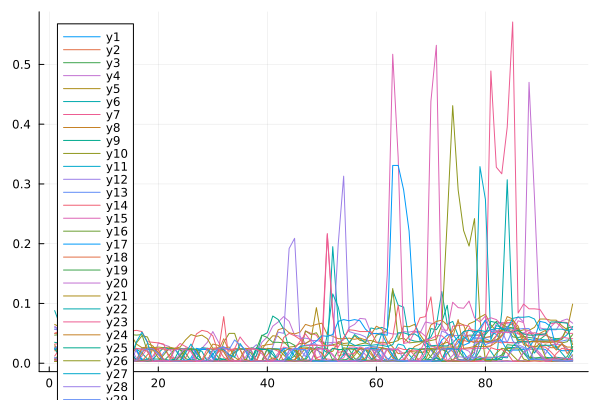

In [73]:
af = df[1]
gf = permutedims(af,"Giorno")
plot(Matrix(gf[1:end-1,2:end]))


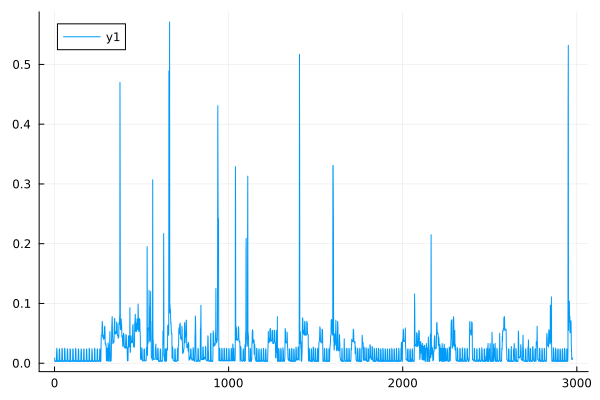

In [74]:
gl = Matrix(gf[1:end-1,2:end])
rgl = reshape(gl,1,:)

N_q = Int64(size(rgl,2))
plot(1:N_q,rgl[1:end])

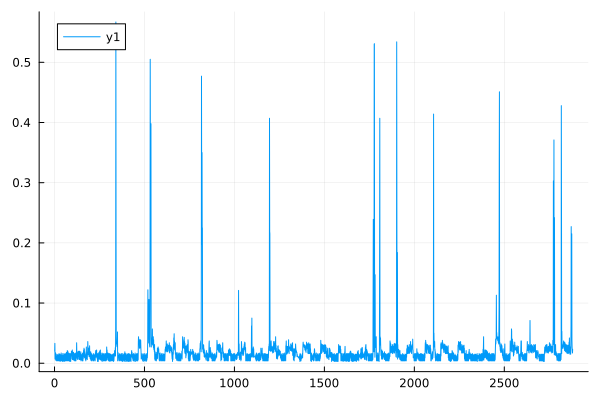

1×6 Matrix{Int64}:
 1  6  2  7  34  8